## Double  Pendulum Simulation and Animation

Useful links

https://jakevdp.github.io/blog/2017/03/08/triple-pendulum-chaos/

https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

https://matplotlib.org/2.0.2/examples/animation/double_pendulum_animated.html

https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c

https://www.bragitoff.com/2020/10/3d-trajectory-animated-using-matplotlib-python/

In [1]:
from numpy import sin, cos
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

In [2]:
# Set some constants of the problem 

L1 = 1.0 #Pendulum length 1 in m
L2 = 1.0 #Pendulum length 2 in n
M1 = 1.2 #Pendulum mass 1 in kg
M2 = 1.0 #Pendulum mass 2 in kg
g = 9.81 #g acceleration in m/s^2

# Define an array for time

steps = 500

t = np.linspace(0,20,steps)

dt = t[steps-1] / steps

# Set the initial condition of the system, angular position and angular velocity

th1_0 = math.pi *  0.8 
th2_0 = -math.pi * (1.0 / 4.7)
w1 = 0.1
w2 = 0.1

inicond = [th1_0, w1, th2_0, w2] 

In [3]:
# Definition of the ODE model

def equation(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*g*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*g*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*g*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*g*sin(state[2]))/den2

    return dydx

#Integration

state = integrate.odeint(equation, inicond, t)


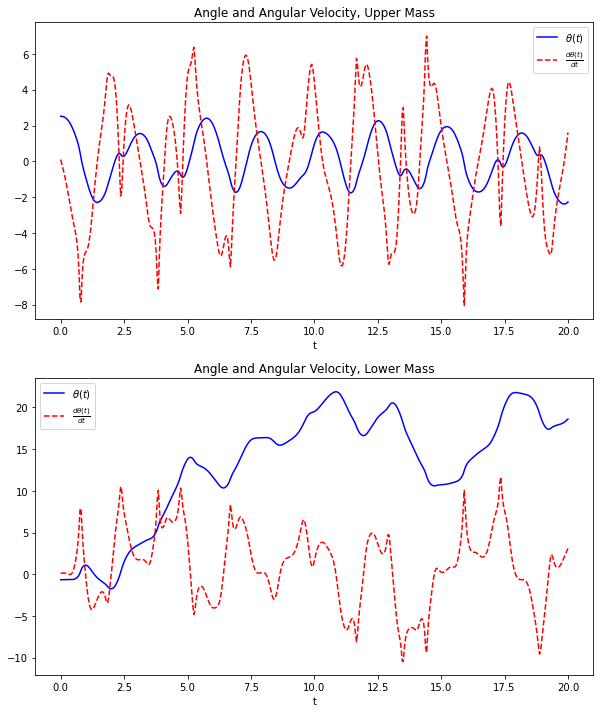

In [4]:
#Plotting

fig, axs = plt.subplots(2, figsize=(10,12))

axs[0].set_title("Angle and Angular Velocity, Upper Mass")
axs[0].plot(t,state[:,0], 'b-', label=r'$\theta(t)$')
axs[0].plot(t, state[:,1], 'r--', label= r'$\frac{d\theta(t)}{dt}$')
axs[0].set_xlabel('t')
axs[0].legend(loc="best")
axs[1].set_title("Angle and Angular Velocity, Lower Mass")
axs[1].plot(t,state[:,2], 'b-', label=r'$\theta(t)$')
axs[1].plot(t, state[:,3], 'r--', label= r'$\frac{d\theta(t)}{dt}$')
axs[1].set_xlabel('t')
axs[1].legend(loc="best")
plt.show()
fig.savefig('pendulum__double_plot_3.png')

In [5]:
# Defining the x and y points. 

x1 = L1 * np.sin(state[:, 0])
y1 = -L1 * np.cos(state[:, 0])
x2 = L2 * np.sin(state[:, 2]) + x1
y2 = -L2 * np.cos(state[:, 2]) + y1

In [6]:
# Now set up the figure to produce 

fig1 = plt.figure()
ax = fig1.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-3, 2))
ax.grid()

# Set up the empty elements to animate later. It would be nice to add the energy and not only the elapsed time!

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Init function, setting both line and text to nothing

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

# Animate function, updating.

def animate(i):
    nowx = [0, x1[i], x2[i]]
    nowy = [0, y1[i], y2[i]]
    
    line.set_data(nowx, nowy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

# Actual Animation

ani = animation.FuncAnimation(fig1, animate, np.arange(1, len(state)), interval=20, init_func=init, blit=True)

dpi = 400
writer = animation.writers['ffmpeg'](fps=30)

ani.save('pendulum_double_3.mp4', writer=writer, dpi=dpi)

plt.close()

In [7]:
# SECOND ANIMATION, TRAJECTORY

plt.style.use('dark_background')

# Now set up the figure to produce 

fig2 = plt.figure()
ax = fig2.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-3, 2))

# Set up the empty elements to animate later. It would be nice to add the energy and not only the elapsed time!

ln, = ax.plot([], [], lw=2) #No markers on the line now, just the line

time_template = 'time = %.1fs'
time_txt = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Init function, setting both line and text to nothing

def init2():
    ln.set_data([], [])
    time_txt.set_text('')
    return ln, time_txt

# Animate function, updating 2

xi, yi = [], []

def animate2(i):
    ln.set_data(x2[0:i], y2[0:i])
    time_txt.set_text(time_template % (i*dt))
    return ln, time_txt

# Actual Animation

anim = animation.FuncAnimation(fig2, animate2, np.arange(1, len(state)), interval=10, init_func=init2, blit=True)

dpi = 400
writer = animation.writers['ffmpeg'](fps=30)

anim.save('trajectory_double_3.mp4', writer=writer, dpi=dpi)

plt.close()